In [62]:
from roboticstoolbox import *
import numpy as np
import spatialmath.base.symbolic as sym
from math import pi
import sympy
from roboticstoolbox.backends.PyPlot import PyPlot
from roboticstoolbox.backends.swift import Swift
from Models import *

### Robot model definition

In [57]:
robot = TwoLink()
link1 = robot["link1"]
A1 = link1.A(pi/3)

link1, A1

(RevoluteDH(d=0, a=1, ⍺=0, name = "link1", m=0, r=[0, 0, 0], I=[0, 0, 0, 0, 0, 0], Jm=0, B=0, Tc=[0, 0], G=0),
    0.5      -0.866     0         0.5       
   0.866     0.5       0         0.866     
   0         0         1         0         
   0         0         0         1         
)

In [55]:
robot.fkine(robot.qr)

   0        -1         0         1         
   1         0         0         1         
   0         0         1         0         
   0         0         0         1         


### Simple trajectory execution

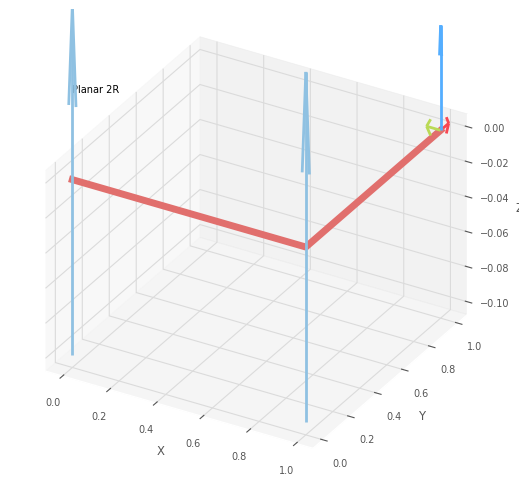

PyPlot3D backend, t = 1.5000000000000007, scene:
  robot: Text(0.0, 0.0, 'Planar 2R')

<Figure size 640x480 with 0 Axes>

In [17]:
qt = jtraj(robot.qr, robot.qg, 30)
robot.plot(qt.q, backend='pyplot', movie='planar.gif')

### Simple kinematic control loop

#### Textual algorithm

In [71]:
# Environment creation
robot = models.DH.Puma560()
env = Swift()
env.launch(realtime=True, browser="notebook")
env.add(robot)
robot.q = robot.qr
env.step(0)

# Simulation of arbitrary velocity
robot.qd = np.array([0.8,1,1,0.1,0.1,0.1])
for _ in range(100):
    env.step(0.05)

#### BDSim (Simulink-alike)